In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Draw two training curves

In [2]:
path1 = '../../data/experiments/slowfast/slowfast_sg/2023_04_21-runtime-n2/'
path2 = '../../data/experiments/slowfast/slowfast_sg/2023_05_04-runtime-n/'

In [3]:
# set the following parameters manually
train_sizes = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650]
val_sizes = [50]
train_its = 100
val_its = 1
legend = ['complete', 'sparse']
sg_params = {'Dt': 'None/50', 'Dvt': '2000/26', 'Dv': '0', 'mu': 30}
# sg_opt_params = {'num_its': '500'}
data_params = {'feature_id': 'slowfast'}

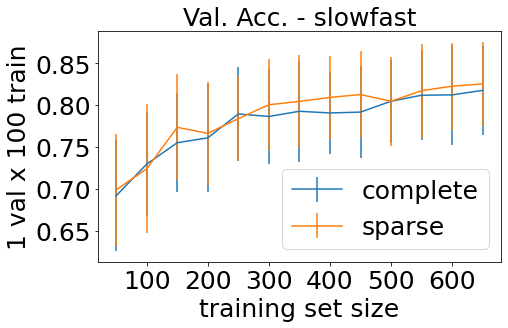

In [19]:
assess_qs = ['min_acc', 'val_acc', 'missed', 'false_alarm']
# read the first path's training curves
curves1 = {}
errors1 = {}
for i in range(len(val_sizes)):
    curves_i = np.loadtxt(path1+'curves/train_'+str(i)+'.txt')
    j = 0
    for quantity in assess_qs:
        if i==0:
            curves1[quantity] = curves_i[j::8].reshape((1, -1))
            errors1[quantity] = curves_i[j+1::8].reshape((1, -1))
        else:
            curves1[quantity] = np.concatenate((curves1[quantity], [curves_i[j::8]]), axis=0)
            errors1[quantity] = np.concatenate((errors1[quantity], [curves_i[j+1::8]]), axis=0)
        j += 2
        
# read the second path's training curves
curves2 = {}
errors2 = {}
for i in range(len(val_sizes)):
    curves_i = np.loadtxt(path2+'curves/train_'+str(i)+'.txt')
    j = 0
    for quantity in assess_qs:
        if i==0:
            curves2[quantity] = curves_i[j::8].reshape((1, -1))
            errors2[quantity] = curves_i[j+1::8].reshape((1, -1))
        else:
            curves2[quantity] = np.concatenate((curves2[quantity], [curves_i[j::8]]), axis=0)
            errors2[quantity] = np.concatenate((errors2[quantity], [curves_i[j+1::8]]), axis=0)
        j += 2

# plot training curves together
plt.figure(figsize=(7,4))
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.8,hspace=0.8)
for i in range(len(val_sizes)):
    plt.subplot(len(val_sizes), 1, i+1)
    plt.errorbar(train_sizes, curves1['val_acc'][i], errors1['val_acc'][i])
    plt.errorbar(train_sizes, curves2['val_acc'][i], errors2['val_acc'][i])
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.legend(legend, fontsize=25)
    plt.xlabel('training set size', fontsize=25)
    plt.ylabel('{} val x {} train'.format(val_its, train_its), fontsize=25)
    _ = plt.title('Val. Acc. - {}'.format(data_params['feature_id']), fontsize=25)
#     _ = plt.title('Val. Acc. - {}, Dt = {}, Dvt = {}, Dv = {}, $\mu$ = {}'
#                   .format(data_params['feature_id'], sg_params['Dt'], sg_params['Dvt'], sg_params['Dv'], sg_params['mu'])
#                   , fontsize=25)
plt.savefig(path1+'comparepic1.png',dpi=300, bbox_inches = "tight")

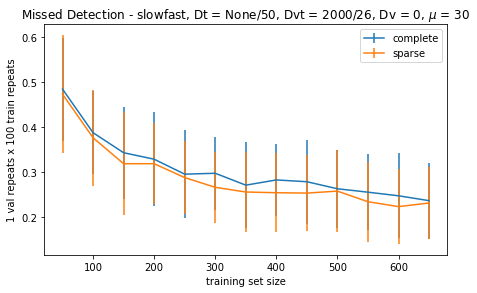

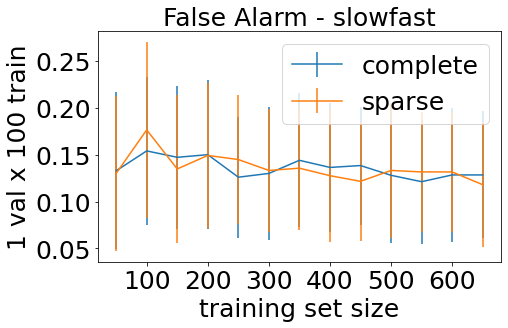

In [20]:
# plot missed detection curves together
plt.figure(figsize=(7,4))
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.8,hspace=0.8)
for i in range(len(val_sizes)):
    plt.subplot(len(val_sizes), 1, i+1)
    plt.errorbar(train_sizes, curves1['missed'][i], errors1['missed'][i])
    plt.errorbar(train_sizes, curves2['missed'][i], errors2['missed'][i])
    plt.legend(legend)
    plt.xlabel('training set size')
    plt.ylabel('{} val repeats x {} train repeats'.format(val_its, train_its))
    _ = plt.title('Missed Detection - {}, Dt = {}, Dvt = {}, Dv = {}, $\mu$ = {}'.format(data_params['feature_id'], sg_params['Dt'], sg_params['Dvt'], sg_params['Dv'], sg_params['mu']))
plt.savefig(path1+'comparepic2.png',dpi=300, bbox_inches = "tight")

# plot false alarm curves together
plt.figure(figsize=(7,4))
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.8,hspace=0.8)
for i in range(len(val_sizes)):
    plt.subplot(len(val_sizes), 1, i+1)
    plt.errorbar(train_sizes, curves1['false_alarm'][i], errors1['false_alarm'][i])
    plt.errorbar(train_sizes, curves2['false_alarm'][i], errors2['false_alarm'][i])
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.legend(legend, fontsize=25)
    plt.xlabel('training set size', fontsize=25)
    plt.ylabel('{} val x {} train'.format(val_its, train_its), fontsize=25)
    _ = plt.title('False Alarm - {}'.format(data_params['feature_id']), fontsize=25)
#     _ = plt.title('False Alarm - {}, Dt = {}, Dvt = {}, Dv = {}, $\mu$ = {}'.format(data_params['feature_id'], sg_params['Dt'], sg_params['Dvt'], sg_params['Dv'], sg_params['mu']))
plt.savefig(path1+'comparepic3.png',dpi=300, bbox_inches = "tight")

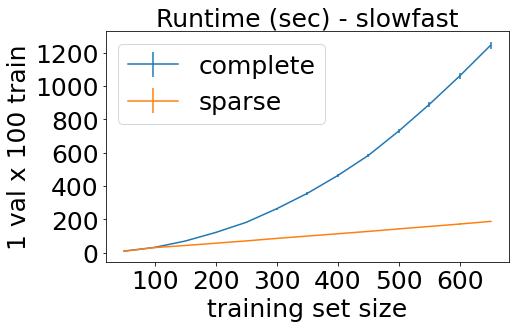

In [18]:
# read the first path's runtime curve
curves1 = {}
errors1 = {}
for i in range(len(val_sizes)):
    curves_i = np.loadtxt(path1+'curves/runtime_'+str(i)+'.txt')
    if i==0:
        curves1 = curves_i[::2].reshape((1, -1))
        errors1 = curves_i[1::2].reshape((1, -1))
    else:
        curves1 = np.concatenate((curves1, [curves_i[0::2]]), axis=0)
        errors1 = np.concatenate((errors1, [curves_i[1::2]]), axis=0)

# read the second path's runtime curve
curves2 = {}
errors2 = {}
for i in range(len(val_sizes)):
    curves_i = np.loadtxt(path2+'curves/runtime_'+str(i)+'.txt')
    if i==0:
        curves2 = curves_i[::2].reshape((1, -1))
        errors2 = curves_i[1::2].reshape((1, -1))
    else:
        curves2 = np.concatenate((curves2, [curves_i[0::2]]), axis=0)
        errors2 = np.concatenate((errors2, [curves_i[1::2]]), axis=0)
        
# plot runtime curves together
plt.figure(figsize=(7,4))
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.8,hspace=0.8)
for i in range(len(val_sizes)):
    plt.subplot(len(val_sizes), 1, i+1)
    plt.errorbar(train_sizes, curves1[i], errors1[i])
    plt.errorbar(train_sizes, curves2[i], errors2[i])
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.legend(legend, fontsize=25)
    plt.xlabel('training set size', fontsize=25)
    plt.ylabel('{} val x {} train'.format(val_its, train_its), fontsize=25)
    _ = plt.title('Runtime (sec) - {}'.format(data_params['feature_id']), fontsize=25)
#     _ = plt.title('Runtime - {}, Dt = {}, Dvt = {}, Dv = {}, $\mu$ = {}'.format(data_params['feature_id'], sg_params['Dt'], sg_params['Dvt'],sg_params['Dv'],sg_params['mu']))
plt.savefig(path1+'comparepic4.png',dpi=300, bbox_inches = "tight")

# Draw multiple plots on one figure

In [3]:
def read_train_curves(val_sizes, res_path):
    assess_qs = ['min_acc', 'val_acc', 'missed', 'false_alarm']
    curves = {}
    errors = {}
    for i in range(len(val_sizes)):
        curves_i = np.loadtxt(res_path+'curves/train_'+str(i)+'.txt')
        j = 0
        for quantity in assess_qs:
            if i==0:
                curves[quantity] = curves_i[j::8].reshape((1, -1))
                errors[quantity] = curves_i[j+1::8].reshape((1, -1))
            else:
                curves[quantity] = np.concatenate((curves[quantity], [curves_i[j::8]]), axis=0)
                errors[quantity] = np.concatenate((errors[quantity], [curves_i[j+1::8]]), axis=0)
            j += 2
            
        return curves, errors

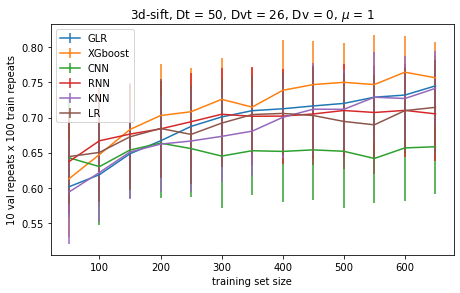

In [18]:
# set the parameters
res_path_1 = '../../../local_data/experiments/mentioned in the thesis/sift3d/2023_07_11/'
res_path_2 = '../../../local_data/experiments/mentioned in the thesis/benchmarks for 3dsift/2023_07_12-knn-xgb/xgb/'
res_path_3 = '../../../local_data/experiments/mentioned in the thesis/benchmarks for 3dsift/2023_07_12-nn-lgrg/nn/'
res_path_4 = 'results/'
res_path_5 = '../../../local_data/experiments/mentioned in the thesis/benchmarks for 3dsift/2023_07_12-knn-xgb/knn/'
res_path_6 = '../../../local_data/experiments/mentioned in the thesis/benchmarks for 3dsift/2023_07_12-nn-lgrg/lgrg/'

rnd_params = {'train_sizes': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650],
              'val_sizes': [50], 'train_its': 100, 'val_its': 10, 'seed': None}
legend = ['GLR','XGboost', 'CNN', 'RNN', 'KNN', 'LR']
title = '3d-sift, Dt = 50, Dvt = 26, Dv = 0, $\mu$ = 1'


# unpack params
train_sizes = rnd_params['train_sizes']
val_sizes = rnd_params['val_sizes']
train_its = rnd_params['train_its']
val_its = rnd_params['val_its']

# read training curves
curves_1, errors_1 = read_train_curves(val_sizes, res_path_1)
curves_2, errors_2 = read_train_curves(val_sizes, res_path_2)
curves_3, errors_3 = read_train_curves(val_sizes, res_path_3)
# curves_4, errors_4 = read_train_curves(val_sizes, res_path_4)
curves_5, errors_5 = read_train_curves(val_sizes, res_path_5)
curves_6, errors_6 = read_train_curves(val_sizes, res_path_6)

curve_4 = np.load(res_path_4+'mean_accs.npy')/100
error_4 = np.load(res_path_4+'std_accs.npy')/100

# plot training curves
plt.figure(figsize=(7,4))
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.8,hspace=0.8)
for i in range(len(val_sizes)):
    plt.subplot(len(val_sizes), 1, i+1)
    plt.errorbar(train_sizes, curves_1['val_acc'][i], errors_1['val_acc'][i])
    plt.errorbar(train_sizes, curves_2['val_acc'][i], errors_2['val_acc'][i])
    plt.errorbar(train_sizes, curves_3['val_acc'][i], errors_3['val_acc'][i])
    # plt.errorbar(train_sizes, curves_4['val_acc'][i], errors_4['val_acc'][i])
    plt.errorbar(train_sizes, curve_4, error_4)
    plt.errorbar(train_sizes, curves_5['val_acc'][i], errors_5['val_acc'][i])
    plt.errorbar(train_sizes, curves_6['val_acc'][i], errors_6['val_acc'][i])
    
    plt.legend(legend)
    plt.xlabel('training set size')
    plt.ylabel('{} val repeats x {} train repeats'.format(val_its, train_its))
    _ = plt.title(title)
plt.savefig(res_path_1+'benchmarks_rnn.png')

<Figure size 432x288 with 0 Axes>